###Config

In [1]:
from sqlalchemy import create_engine
import sqlite3
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [43]:
!pip install pandas_ta
!pip install finagg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.7/48.7 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.3/65.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.31
    Uninstalling yfinance-0.2.31:
      Successfully uninstalled yfinance-0.2.31


###Engine

In [2]:
from sqlalchemy import create_engine, inspect, MetaData

db_path = '/content/drive/MyDrive/Facultad/PFC/Implementacion/BD/finagg_data.sqlite'
# Combine all metadata
all_metadata = MetaData()
# Setup the database and create tables based on the combined metadata
engine = create_engine(f'sqlite:///{db_path}')
all_metadata.create_all(engine)

###Inspect

In [ ]:
from sqlalchemy import inspect
# Reflect the tables from the engine into the metadata
all_metadata.reflect(bind=engine)

# Get a list of all the tables
tables = all_metadata.tables.keys()

# Use an inspector to fetch columns and other details
inspector = inspect(engine)

#Ver datos
for table in tables:
    print("Table:", table)
    for column in inspector.get_columns(table):
        print("  Column:", column['name'], column['type'])

Streaming output truncated to the last 5000 lines.
  Column: quarter INTEGER
  Column: value FLOAT
Table: gdp_22_514_z_norm
  Column: year INTEGER
  Column: quarter INTEGER
  Column: value FLOAT
  Column: norm FLOAT
Table: gdp_22_51_z_norm
  Column: year INTEGER
  Column: quarter INTEGER
  Column: value FLOAT
  Column: norm FLOAT
Table: gdp_22_52
  Column: year INTEGER
  Column: quarter INTEGER
  Column: value FLOAT
Table: gdp_22_521CI
  Column: year INTEGER
  Column: quarter INTEGER
  Column: value FLOAT
Table: gdp_22_521CI_z_norm
  Column: year INTEGER
  Column: quarter INTEGER
  Column: value FLOAT
  Column: norm FLOAT
Table: gdp_22_523
  Column: year INTEGER
  Column: quarter INTEGER
  Column: value FLOAT
Table: gdp_22_523_z_norm
  Column: year INTEGER
  Column: quarter INTEGER
  Column: value FLOAT
  Column: norm FLOAT
Table: gdp_22_524
  Column: year INTEGER
  Column: quarter INTEGER
  Column: value FLOAT
Table: gdp_22_524_z_norm
  Column: year INTEGER
  Column: quarter INTEGER
 

####Show data

In [3]:
import pandas as pd
from sqlalchemy import text

def show_data(table, engine=engine):
    with engine.begin() as conn:
        query = text(f"""SELECT * FROM "{table}" """)
        df = pd.read_sql_query(query, conn)
    return df


###Fixed Assets

In [ ]:
table = "fixed_assets"
df = show_data(table)
df

,table_id,series_code,line,line_description,year,metric,units,e,value
0,FAAt101,k1wtotl1es00,1,Fixed assets and consumer durable goods,1925,Current Dollars,Level,9,297.500000
1,FAAt101,k1wtotl1es00,1,Fixed assets and consumer durable goods,1926,Current Dollars,Level,9,307.600006
2,FAAt101,k1wtotl1es00,1,Fixed assets and consumer durable goods,1927,Current Dollars,Level,9,315.500000
3,FAAt101,k1wtotl1es00,1,Fixed assets and consumer durable goods,1928,Current Dollars,Level,9,328.200012
4,FAAt101,k1wtotl1es00,1,Fixed assets and consumer durable goods,1929,Current Dollars,Level,9,333.600006
...,...,...,...,...,...,...,...,...,...
542684,FAAt903,ixgstlc1es00,24,State and local,2017,Chained Dollars,Level,9,358.700012
542685,FAAt903,ixgstlc1es00,24,State and local,2018,Chained Dollars,Level,9,367.200012
542686,FAAt903,ixgstlc1es00,24,State and local,2019,Chained Dollars,Level,9,372.799988
542687,FAAt903,ixgstlc1es00,24,State and local,2020,Chained Dollars,Level,9,375.500000


In [ ]:
table = "fixed_assets"
df = show_data(table)

df["table_id"].unique()

array(['FAAt101', 'FAAt102', 'FAAt103', 'FAAt104', 'FAAt105', 'FAAt106',
       'FAAt107', 'FAAt108', 'FAAt109', 'FAAt201', 'FAAt202', 'FAAt203',
       'FAAt204', 'FAAt205', 'FAAt206', 'FAAt207', 'FAAt208', 'FAAt209',
       'FAAt210', 'FAAt301E', 'FAAt301ESI', 'FAAt301I', 'FAAt301S',
       'FAAt302E', 'FAAt302ESI', 'FAAt302I', 'FAAt302S', 'FAAt303E',
       'FAAt303ESI', 'FAAt303I', 'FAAt303S', 'FAAt304E', 'FAAt304ESI',
       'FAAt304I', 'FAAt304S', 'FAAt305E', 'FAAt305ESI', 'FAAt305I',
       'FAAt305S', 'FAAt306E', 'FAAt306ESI', 'FAAt306I', 'FAAt306S',
       'FAAt307E', 'FAAt307ESI', 'FAAt307I', 'FAAt307S', 'FAAt308E',
       'FAAt308ESI', 'FAAt308I', 'FAAt308S', 'FAAt309E', 'FAAt309ESI',
       'FAAt309I', 'FAAt309S', 'FAAt310E', 'FAAt310ESI', 'FAAt310I',
       'FAAt310S', 'FAAt401', 'FAAt402', 'FAAt403', 'FAAt404', 'FAAt405',
       'FAAt406', 'FAAt407', 'FAAt408', 'FAAt409', 'FAAt410', 'FAAt501',
       'FAAt502', 'FAAt503', 'FAAt504', 'FAAt505', 'FAAt506', 'FAAt507',
      

In [ ]:
df["series_code"].unique()

array(['k1wtotl1es00', 'k1ttotl1es00', 'k1ptotl1es00', ...,
       'ixx53101es00', 'ixgfedr1es00', 'ixgstlc1es00'], dtype=object)

In [ ]:
df["line"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103])

In [ ]:
table_id = "FAAt101"
series_code = "k1wtotl1es00"
line = "1"
table = f"fix_as_{table_id}_{series_code}_{line}"
df = show_data(table)

df

,year,line_description,metric,e,value,log_change,norm,norm_log_change
0,1925,Fixed assets and consumer durable goods,Current Dollars,9.0,297.500000,NaN,-0.758299,NaN
1,1926,Fixed assets and consumer durable goods,Current Dollars,9.0,307.600006,0.033386,-0.757840,-0.559526
2,1927,Fixed assets and consumer durable goods,Current Dollars,9.0,315.500000,0.025358,-0.757481,-0.735727
3,1928,Fixed assets and consumer durable goods,Current Dollars,9.0,328.200012,0.039465,-0.756903,-0.426106
4,1929,Fixed assets and consumer durable goods,Current Dollars,9.0,333.600006,0.016319,-0.756658,-0.934127
...,...,...,...,...,...,...,...,...
92,2017,Fixed assets and consumer durable goods,Current Dollars,9.0,64852.699219,0.039815,2.177216,-0.418408
93,2018,Fixed assets and consumer durable goods,Current Dollars,9.0,68245.398438,0.050991,2.331492,-0.173096
94,2019,Fixed assets and consumer durable goods,Current Dollars,9.0,70977.203125,0.039249,2.455715,-0.430843
95,2020,Fixed assets and consumer durable goods,Current Dollars,9.0,74300.703125,0.045762,2.606844,-0.287887


###GDP

In [ ]:
table = "gdp_by_industry"
df = show_data(table)
df

,table_id,freq,year,quarter,industry,industry_description,value
0,1,Q,2005,1,11,"Agriculture, forestry, fishing, and hunting",131.000000
1,1,Q,2005,1,111CA,Farms,107.500000
2,1,Q,2005,1,113FF,"Forestry, fishing, and related activities",23.500000
3,1,Q,2005,1,21,Mining,196.399994
4,1,Q,2005,1,211,Oil and gas extraction,133.000000
...,...,...,...,...,...,...,...
151189,209,Q,2023,1,ORE,Other real estate,824.000000
151190,209,Q,2023,1,PGOOD,Private goods-producing industries<sup>2</sup>,4942.899902
151191,209,Q,2023,1,PROF,Professional and business services,1770.800049
151192,209,Q,2023,1,PSERV,Private services-producing industries<sup>3</sup>,9821.299805


In [ ]:
table = "gdp_15_21"
df = show_data(table)
df

,year,quarter,value
0,2005,1,342.100006
1,2005,2,369.000000
2,2005,3,405.200012
3,2005,4,461.700012
4,2006,1,445.700012
...,...,...,...
68,2022,1,823.000000
69,2022,2,976.799988
70,2022,3,951.700012
71,2022,4,813.500000


###Target Slope EMA


In [ ]:
yf_df = show_data("yfinance.raw.prices")

<ipython-input-100-5bd21869f1fa>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ticker_data = yf_df[yf_df['ticker'] == ticker][(yf_df['date'] >= start_date) & (yf_df['date'] <= end_date)]


<Axes: xlabel='date'>

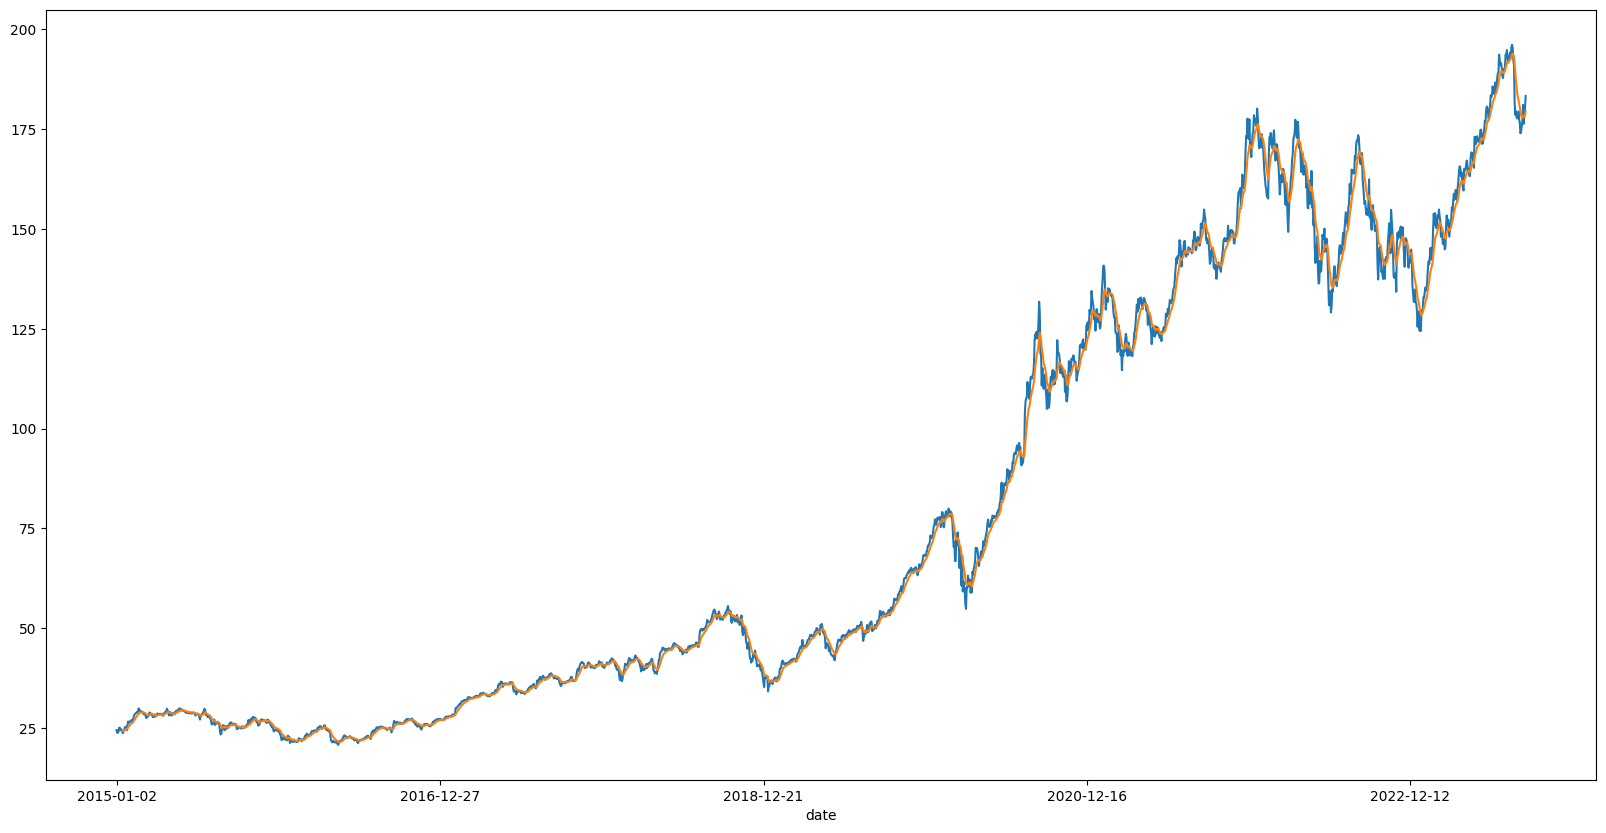

In [100]:
import pandas_ta as ta
ticker = "AAPL"
ema_c = 10
start_date = '2015-01-01'  # Reemplaza con la fecha de inicio deseada
end_date = yf_df['date'].max()    # Reemplaza con la fecha de finalización deseada


ticker_data = yf_df[yf_df['ticker'] == ticker][(yf_df['date'] >= start_date) & (yf_df['date'] <= end_date)]



ema = ta.ema(ticker_data["close"], ema_c)
ticker_data = ticker_data.set_index('date')
ticker_data['ema'] = ema.values

close_data = ticker_data['close']
ema_data = ticker_data['ema']

close_data.plot(figsize=(20,10))
ema_data.plot(figsize=(20,10))



<Axes: title={'center': 'Prices Log Scale'}, xlabel='date'>

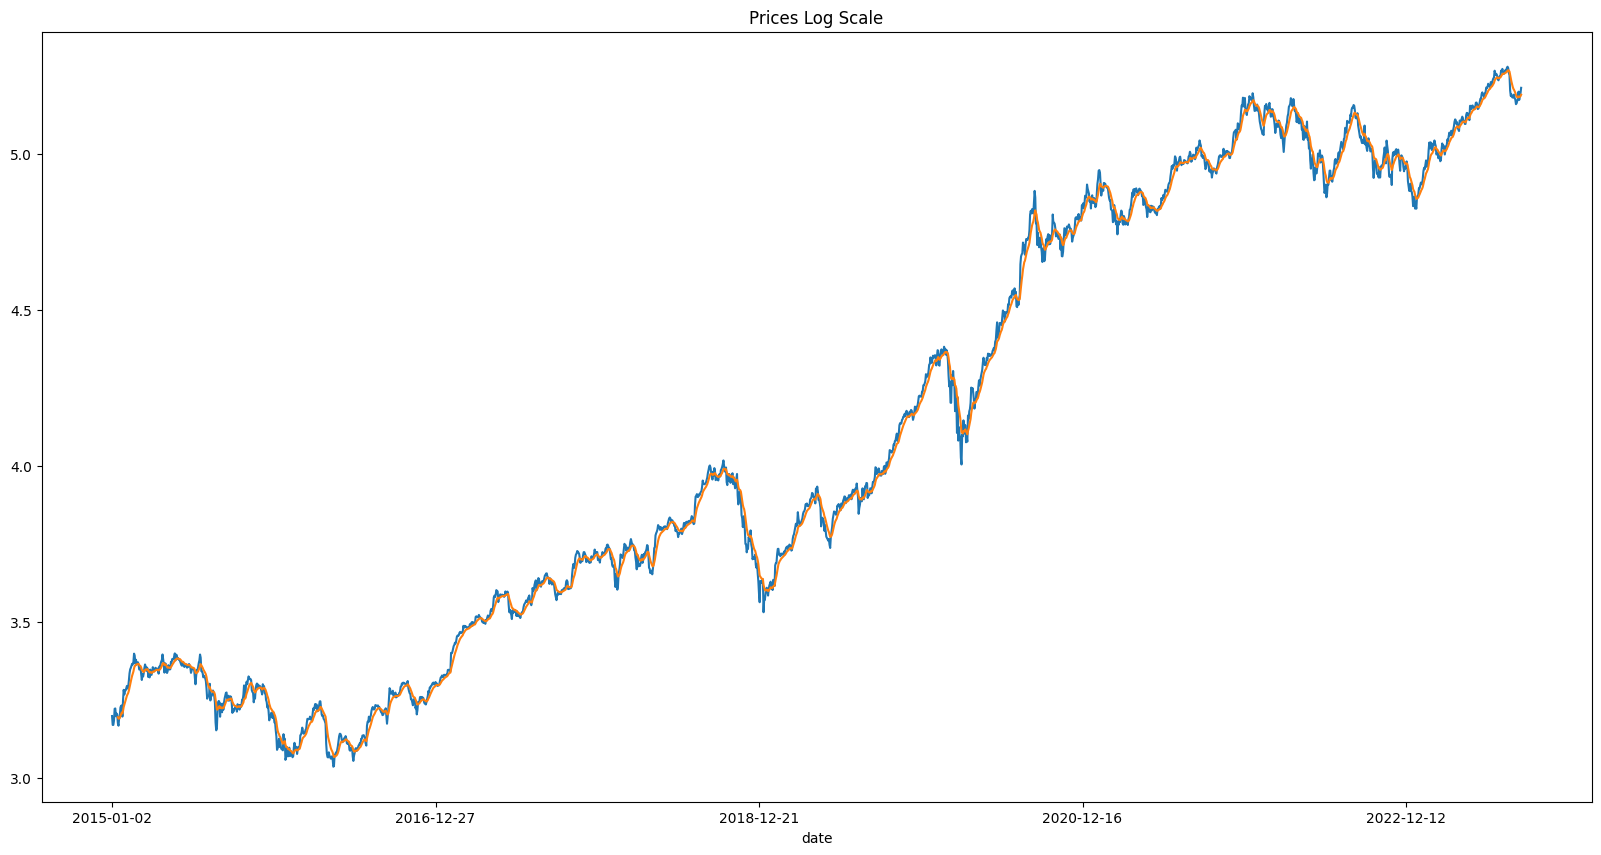

In [101]:
import numpy as np

# Asumiendo que tienes un DataFrame llamado 'ticker_data' con una columna 'price'
ticker_data['log_price'] = np.log(ticker_data['close'])
ticker_data['log_price'].plot(figsize=(20,10))

ema_log = ta.ema(ticker_data["log_price"], ema_c)
ticker_data['ema_log'] = ema_log.values
ticker_data['ema_log'].plot(title="Prices Log Scale")


<Axes: xlabel='date'>

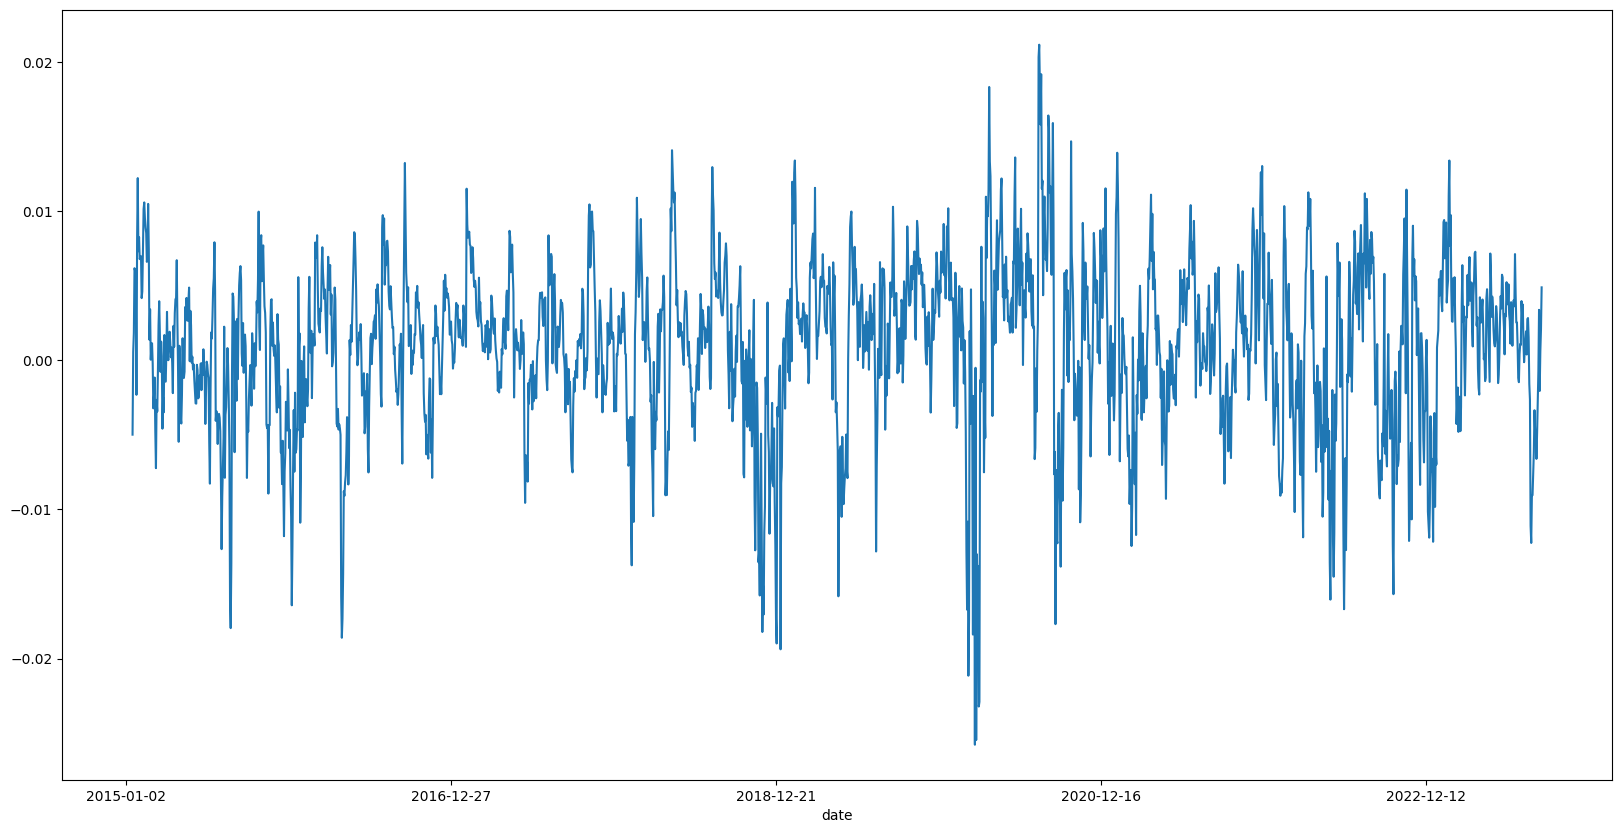

In [102]:
#We will use the ema's slope as a target
ticker_data['ema_log_slope'] = ticker_data['ema_log'].diff()
ticker_data['ema_log_slope'].plot(figsize=(20,10))

<Axes: xlabel='date'>

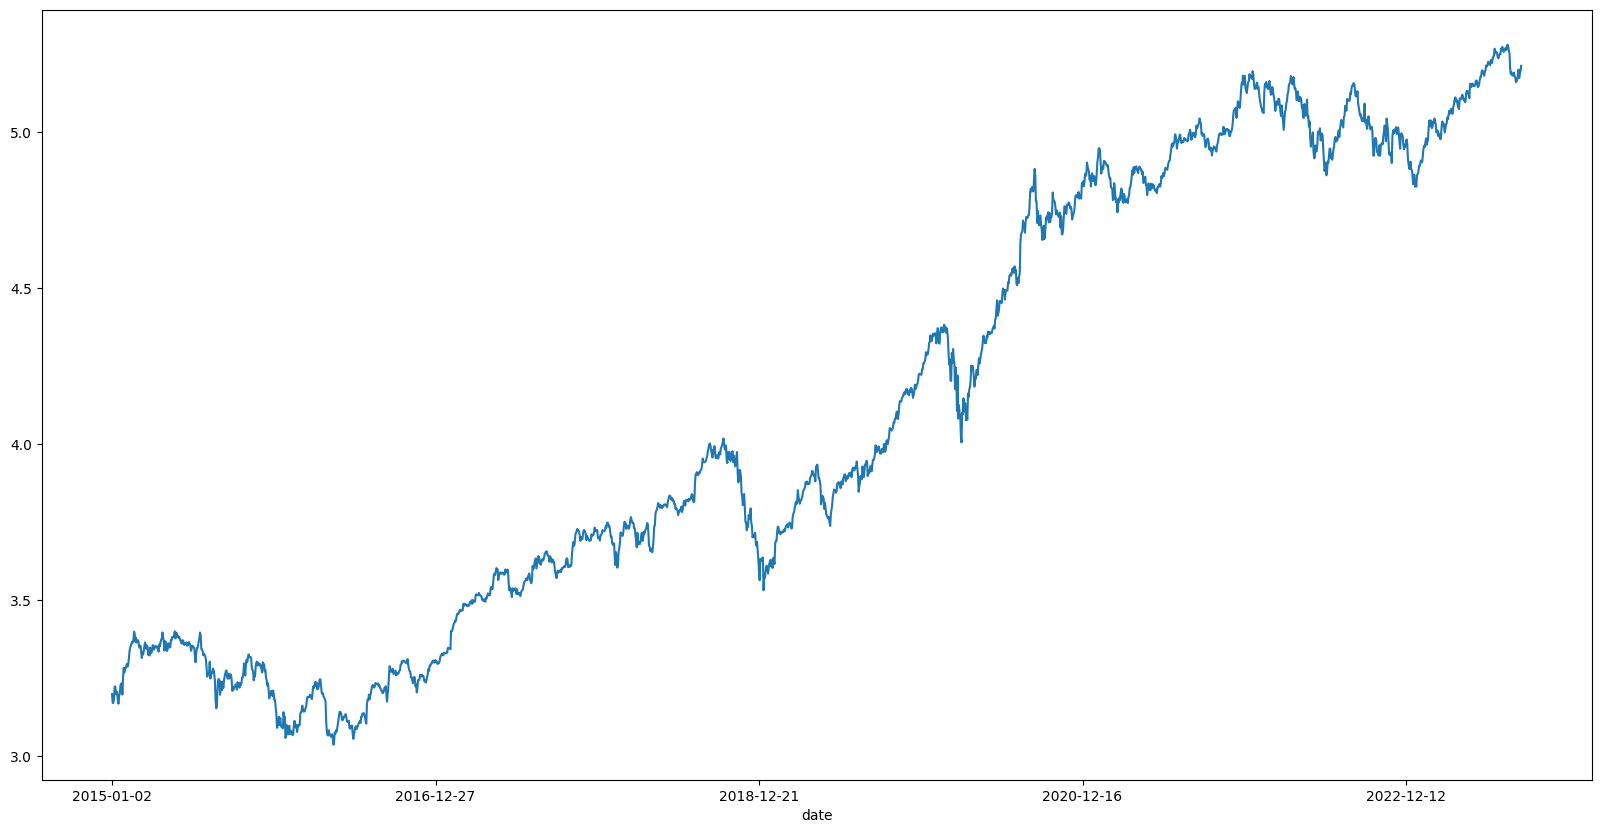

In [109]:
ticker_data['log_price'].plot(figsize=(20,10))

<Axes: xlabel='date'>

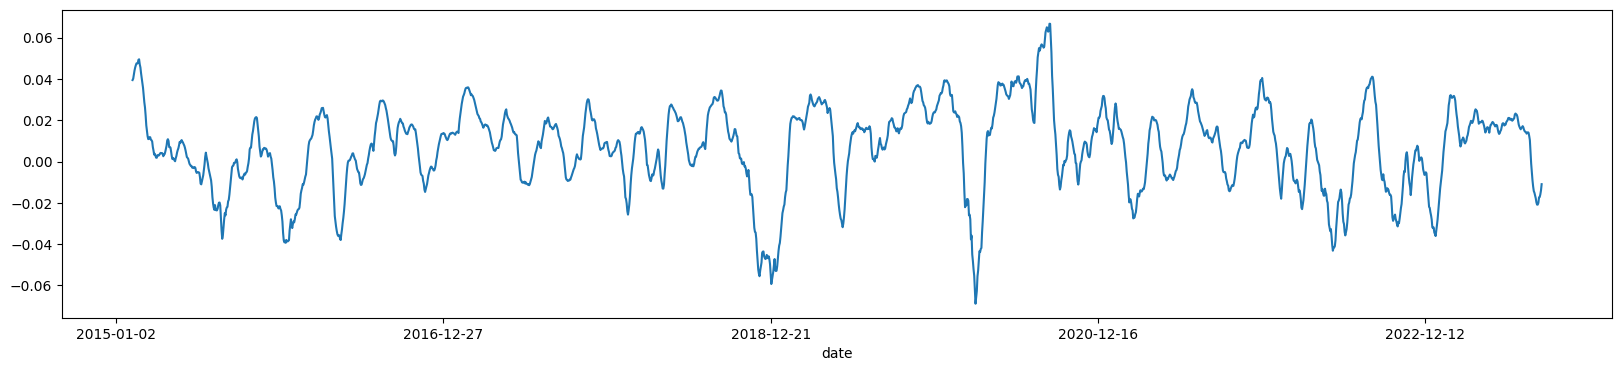

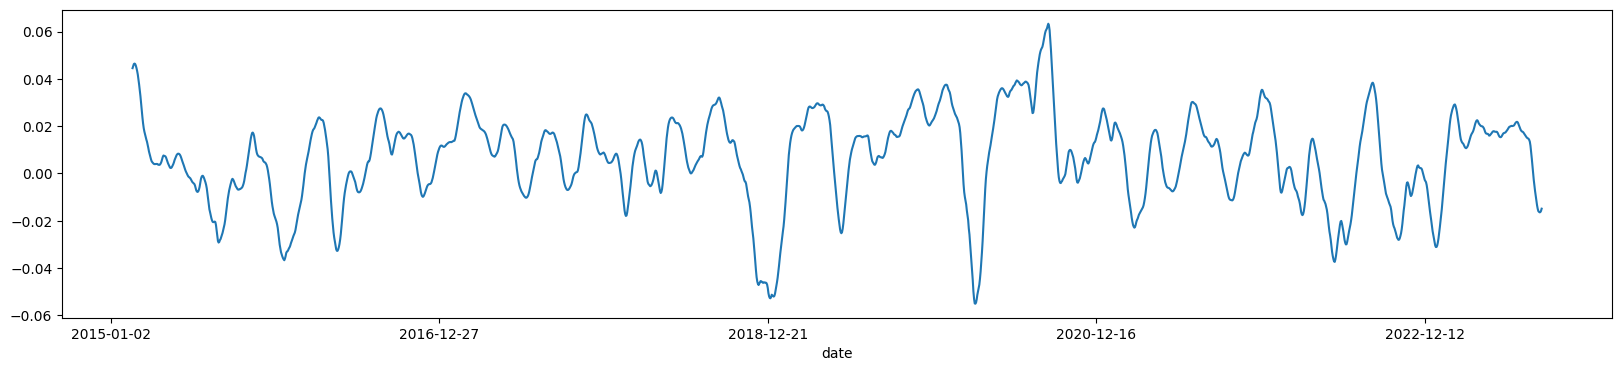

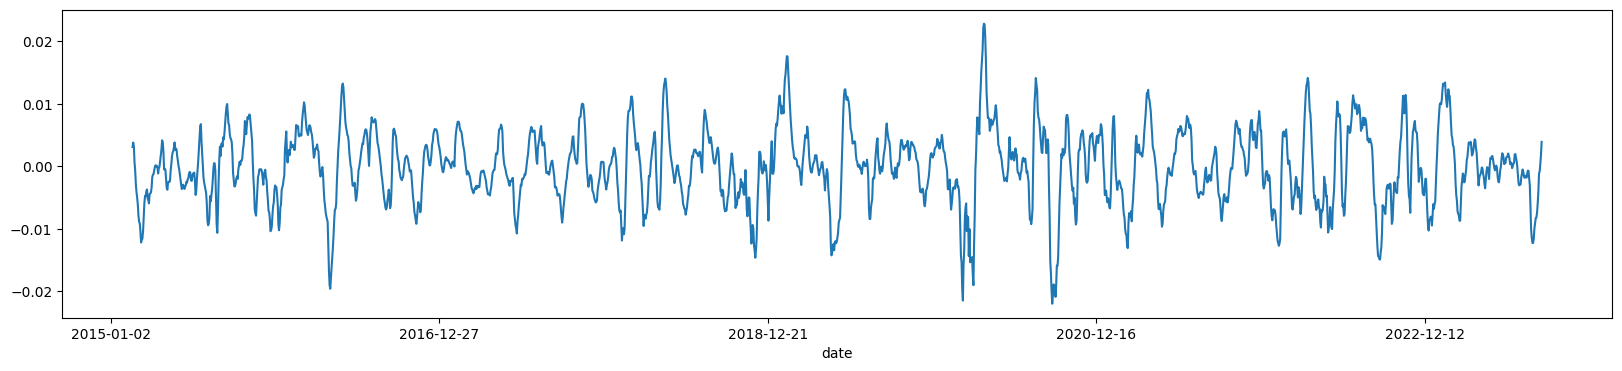

In [121]:
macd = ta.macd(ticker_data["log_price"])
macd
macd.iloc[:,0].plot(figsize=(20,4))
plt.figure()
macd.iloc[:,2].plot(figsize=(20,4))
plt.figure()
macd.iloc[:,1].plot(figsize=(20,4))
# ticker_data["log_macd"].plot(figsize=(20,10))

###Daily Data
#####Los datos de las tablas fred.refined.economic y fundam.refined.fundam.normalized contienen datos en temporalidad diaria

In [ ]:
yf_df = show_data("yfinance.refined.daily")
yf_df

,ticker,date,LOG_CHANGE(open),LOG_CHANGE(high),LOG_CHANGE(low),LOG_CHANGE(close),LOG_CHANGE(volume),"LOG_CHANGE(high, open)","LOG_CHANGE(low, open)"
0,APTV,2011-11-18,0.004695,-0.017952,-0.023811,-0.015592,-1.865401,0.008396,-0.028505
1,APTV,2011-11-21,-0.016529,-0.014032,-0.035815,-0.033902,-0.138711,0.010893,-0.047791
2,APTV,2011-11-22,-0.033902,-0.024799,-0.018654,-0.019901,0.233469,0.019996,-0.032544
3,APTV,2011-11-23,-0.030002,-0.047463,-0.022126,-0.013661,-1.035250,0.002535,-0.024667
4,APTV,2011-11-25,-0.007644,0.003538,0.014463,0.001018,-1.333983,0.013716,-0.002561
...,...,...,...,...,...,...,...,...,...
4039444,CTAS,2023-08-23,0.006550,0.009316,0.004308,0.011486,0.303812,0.006426,-0.004862
4039445,CTAS,2023-08-24,0.006772,0.008545,0.002506,-0.006782,-0.079280,0.008199,-0.009128
4039446,CTAS,2023-08-25,-0.004727,0.002437,0.003175,0.016486,0.130701,0.015363,-0.001226
4039447,CTAS,2023-08-28,0.014277,0.006556,0.013608,0.006190,0.089821,0.007642,-0.001895


<Axes: xlabel='date'>

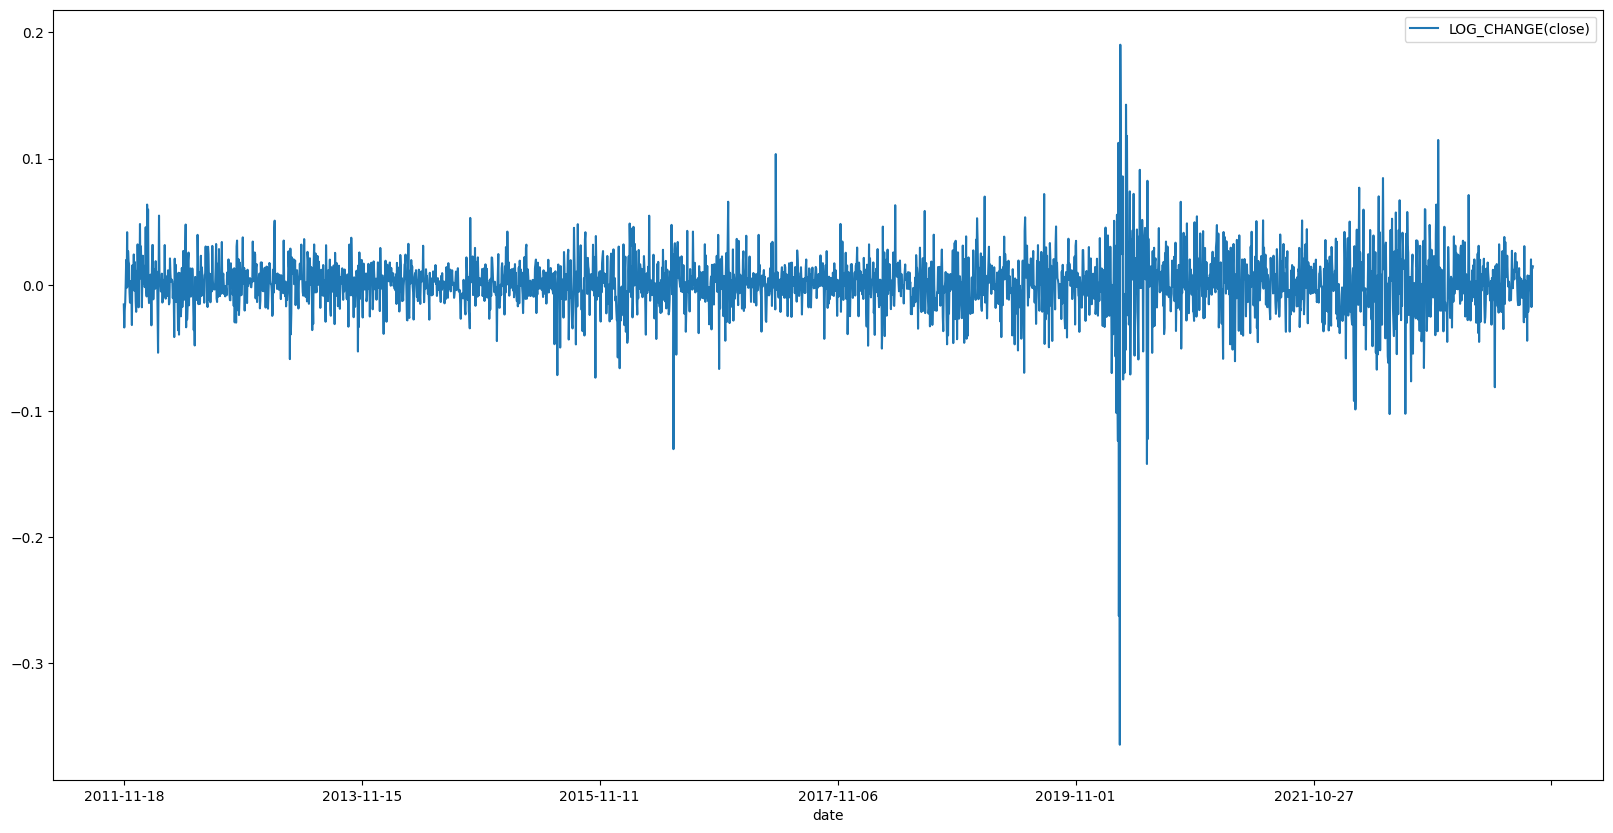

In [ ]:
ticker = 'APTV'
ticker_data = yf_df[yf_df['ticker'] == ticker]

# Ahora, creamos un nuevo DataFrame con la fecha como índice y la columna de precios de cierre
close_data = ticker_data.set_index('date')[['LOG_CHANGE(close)']]

close_data.plot(figsize=(20,10))


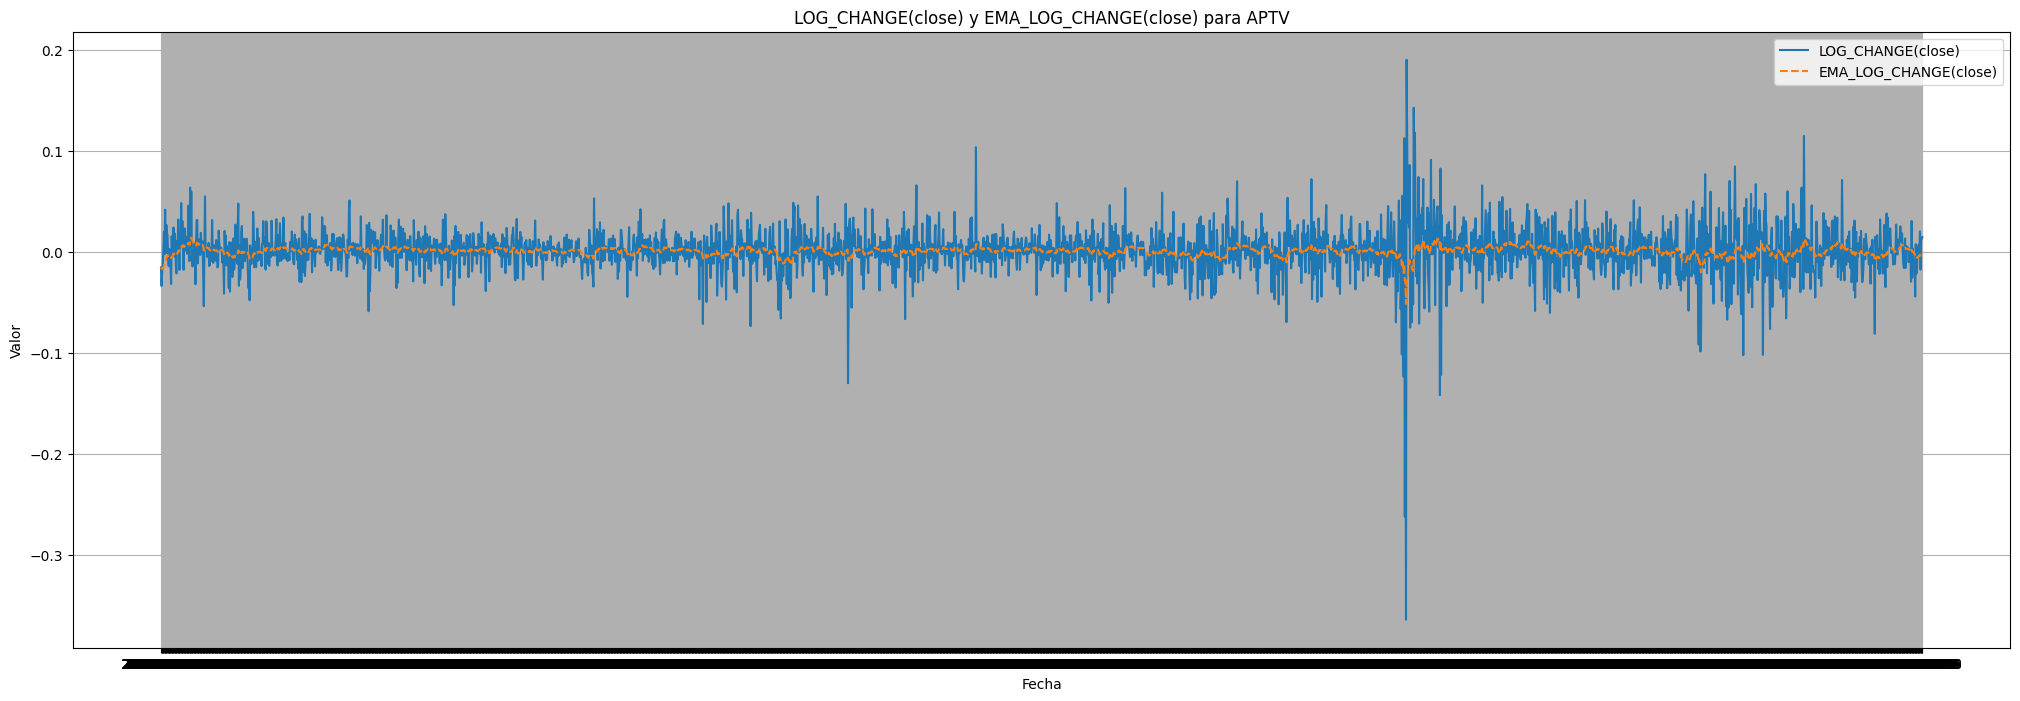

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Asumiendo que yf_df es tu DataFrame
# Reemplaza 'tu_archivo.csv' con la ruta a tu archivo CSV si necesitas cargar el DataFrame desde un archivo
# yf_df = pd.read_csv('tu_archivo.csv')

# Calculando la EMA de la columna 'LOG_CHANGE(close)' para el ticker 'APTV'
yf_df.loc[yf_df['ticker'] == 'APTV', 'EMA_LOG_CHANGE(close)'] = yf_df[yf_df['ticker'] == 'APTV']['LOG_CHANGE(close)'].ewm(span=30, adjust=False).mean()

# Filtrando los datos para el ticker 'APTV'
aptv_data = yf_df[yf_df['ticker'] == 'APTV']

# Graficando la columna 'LOG_CHANGE(close)' y 'EMA_LOG_CHANGE(close)'
plt.figure(figsize=(25, 8))
plt.plot(aptv_data['date'], aptv_data['LOG_CHANGE(close)'], label='LOG_CHANGE(close)')
plt.plot(aptv_data['date'], aptv_data['EMA_LOG_CHANGE(close)'], label='EMA_LOG_CHANGE(close)', linestyle='--')
plt.title('LOG_CHANGE(close) y EMA_LOG_CHANGE(close) para APTV')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

